In [64]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

# ml preprocessing
from sklearn.model_selection import train_test_split

# ml models
from sklearn.linear_model import LinearRegression

In [65]:
# load the data
data_path = 'Datasets/2021-2023/CSB_2021-2023_Hourly_Weather.csv'
weather_data = pd.read_csv(data_path)

In [66]:
# combine 'Date' and 'Hour' columns to a new 'Datetime' column
weather_data['Datetime'] = pd.to_datetime(weather_data['Date'] + ' ' + weather_data['Hour'].astype(str) + ':00:00')

# convert Date to datetime
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

In [67]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     21864 non-null  datetime64[ns]
 1   Hour                     21864 non-null  int64         
 2   Casual                   21853 non-null  float64       
 3   Member                   21853 non-null  float64       
 4   Total_rides              21853 non-null  float64       
 5   temperature_2m (°C)      21864 non-null  float64       
 6   relativehumidity_2m (%)  21864 non-null  int64         
 7   weathercode (wmo code)   21864 non-null  int64         
 8   windspeed_10m (km/h)     21864 non-null  float64       
 9   Datetime                 21864 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(3)
memory usage: 1.7 MB


In [68]:
weather_data.isna().sum()

Date                        0
Hour                        0
Casual                     11
Member                     11
Total_rides                11
temperature_2m (°C)         0
relativehumidity_2m (%)     0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
Datetime                    0
dtype: int64

In [69]:
weather_data.dropna(inplace=True)

In [70]:
weather_data.describe()

,Date,Hour,Casual,Member,Total_rides,temperature_2m (°C),relativehumidity_2m (%),weathercode (wmo code),windspeed_10m (km/h),Datetime
count,21853,21853.000000,21853.000000,21853.000000,21853.000000,21853.000000,21853.000000,21853.000000,21853.000000,21853
mean,2022-04-01 03:23:21.089095424,11.504645,150.390335,223.957626,374.347961,14.029017,68.335332,8.485242,10.266641,2022-04-01 14:53:37.809911808
min,2021-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,-12.800000,19.000000,0.000000,0.000000,2021-01-01 00:00:00
25%,2021-08-16 00:00:00,6.000000,26.000000,50.000000,78.000000,6.200000,52.000000,0.000000,6.800000,2021-08-16 23:00:00
50%,2022-04-01 00:00:00,12.000000,95.000000,186.000000,292.000000,14.300000,69.000000,1.000000,9.300000,2022-04-01 16:00:00
75%,2022-11-15 00:00:00,18.000000,220.000000,341.000000,568.000000,22.000000,85.000000,3.000000,12.900000,2022-11-15 07:00:00
max,2023-06-30 00:00:00,23.000000,1206.000000,1264.000000,1965.000000,36.400000,100.000000,75.000000,36.700000,2023-06-30 23:00:00
std,NaN,6.920976,162.049422,200.588576,343.928606,9.577056,19.531555,18.947863,5.106268,NaN


In [71]:
rides_temp = weather_data[['Total_rides', 'temperature_2m (°C)']]
display(rides_temp.head())
display(rides_temp.shape)

,Total_rides,temperature_2m (°C)
0,46.0,2.4
1,46.0,1.8
2,48.0,1.1
3,16.0,1.6
4,12.0,1.6


(21853, 2)

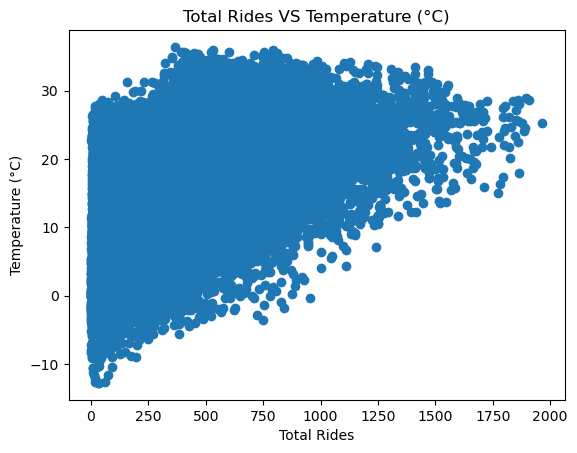

In [72]:
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

# plot the total rides and temperature
plt.scatter(rides_temp['Total_rides'], rides_temp['temperature_2m (°C)'])

plt.show()

In [73]:
# split the data into features (X) and target variable (y)
X_rides_temp = rides_temp.drop(['Total_rides'], axis=1) # features
y_rides_temp = rides_temp['Total_rides']  # target variable

In [74]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rides_temp, y_rides_temp, test_size=0.2)

In [75]:
# train the model 

# initialize the Linear Regression model
lr_rides_temp = LinearRegression()

# train the model
lr_rides_temp.fit(X_train, y_train)

LinearRegression()

In [76]:
# make predictions on the test set
y_pred = lr_rides_temp.predict(X_test)

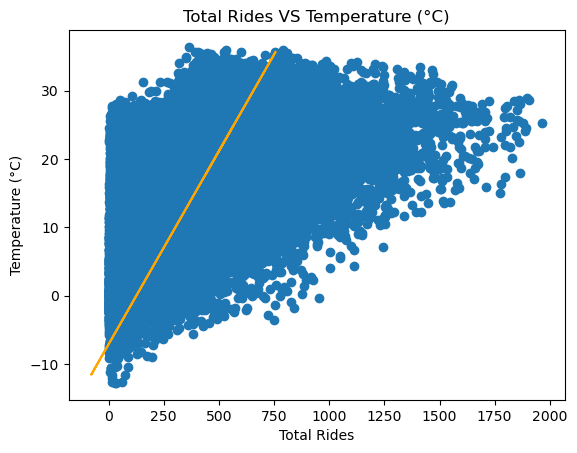

In [77]:
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

# plot the total rides and temperature
plt.scatter(rides_temp['Total_rides'], rides_temp['temperature_2m (°C)'])

# plot the regression line
plt.plot(y_pred, X_test, color="orange")

plt.show()

In [85]:
# predict the rides for one temp sample

#sample_temp = X_test.sample()
sample_temp = pd.DataFrame({'temperature_2m (°C)':[30.0]})
print('sample temperature:\n', sample_temp)
print()
print('prediction:\n', lr_rides_temp.predict(sample_temp))

sample temperature:
    temperature_2m (°C)
0                 30.0

prediction:
 [656.5639596]
